In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('df_audio_features_5000')
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [5]:


df.columns = df.columns.str.strip() #if there are spaces in column names, they will be removes
df['name_art_id']=df['name']+df['artist']+df['id'] #adding new column
df.set_index('name_art_id', inplace=True) #new column will be an index
df.drop(columns=['name','artist','type', 'id', 'html', 'key', 'mode', 'duration_ms','time_signature'], inplace=True) #removing columns that are not necessary for clustering
df.dropna(axis=0, how='any', inplace=True) #removing raws with any null value

    
  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                      Gilberto Gil                                    1n7JnwviZ7zf0LR1tcGFq7  to Ravel: Boléro, M. 81                                                                                                                                                           Maurice Ravel                                   7E1ErYYCn0lYjHODZ1qGuB 
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   loudness          5235 non-null   float64
 3   speechiness       5235 non-null   float64
 4   acousticness      5235 non-null   float64
 5   instrumentalness  5235 non-null   float64
 6   liveness          5235 non-nu

In [ ]:
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#IQR=q3-q1
#not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] #table without ourliers if any exists

In [ ]:
#not_outliers.info()

In [8]:
from sklearn.preprocessing import MinMaxScaler
df_norm = MinMaxScaler().fit_transform(df) #normalization of the values in the tables
table_normalized=pd.DataFrame(df_norm, columns=df.columns, index=df.index)
    
table_normalized

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_art_id,,,,,,,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 Pyotr Ilyich Tchaikovsky 1aEhYlZtypmipA06SDJ4U3",0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique Tristan Murail 1Gfqe7TAKklmuZf6hxsH6h",0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) Arnold Schoenberg 2XNwnFrdMDpismp0VUZ7cU",0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [28]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=3)

pca.fit(df_norm)
tab=pca.transform(df_norm) # transforming 9 columns into 3 meaningful columns, without losing too much data, but keeping sense
pca_table = pd.DataFrame(tab)
pca_table


,0,1,2
0,0.240558,-0.505039,-0.273882
1,-0.208316,-0.383904,0.091799
2,-0.328660,-0.471112,0.285064
3,0.383740,-0.816332,-0.078838
4,0.442607,-0.754764,-0.165603
...,...,...,...
5230,1.113407,-0.125915,-0.113825
5231,0.915734,-0.222037,-0.319475
5232,1.409961,0.002957,-0.024864
5233,1.039605,-0.226845,-0.276935


In [27]:
pca_table['ar_id']=df.index
pca_table = pca_table.set_index('ar_id')
pca_table

,0,1,2,cluster
ar_id,,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.240558,-0.505039,-0.273882,7
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.208316,-0.383904,0.091799,16
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",-0.328660,-0.471112,0.285064,4
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.383740,-0.816332,-0.078838,7
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.442607,-0.754764,-0.165603,7
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 Pyotr Ilyich Tchaikovsky 1aEhYlZtypmipA06SDJ4U3",1.113407,-0.125915,-0.113825,6
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique Tristan Murail 1Gfqe7TAKklmuZf6hxsH6h",0.915734,-0.222037,-0.319475,18
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) Arnold Schoenberg 2XNwnFrdMDpismp0VUZ7cU",1.409961,0.002957,-0.024864,6


In [21]:
pca_table

,0,1,2,cluster
ar_id,,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.240558,-0.505039,-0.273882,7
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.208316,-0.383904,0.091799,16
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",-0.328660,-0.471112,0.285064,4
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.383740,-0.816332,-0.078838,7
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.442607,-0.754764,-0.165603,7
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 Pyotr Ilyich Tchaikovsky 1aEhYlZtypmipA06SDJ4U3",1.113407,-0.125915,-0.113825,6
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique Tristan Murail 1Gfqe7TAKklmuZf6hxsH6h",0.915734,-0.222037,-0.319475,18
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) Arnold Schoenberg 2XNwnFrdMDpismp0VUZ7cU",1.409961,0.002957,-0.024864,6


In [14]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=20)
kmeans.fit(pca_table)
clusters = kmeans.predict(pca_table)

In [15]:

pca_table['cluster']=clusters

In [16]:
pca_tab5000_clus = pca_table.groupby(by='cluster').mean()

from sklearn.metrics import pairwise_distances
pca_tab_5000 = pd.DataFrame(pairwise_distances(pca_tab5000_clus), 
                   index=pca_tab5000_clus.index, 
                   columns=pca_tab5000_clus.index)

<AxesSubplot:xlabel='cluster', ylabel='cluster'>

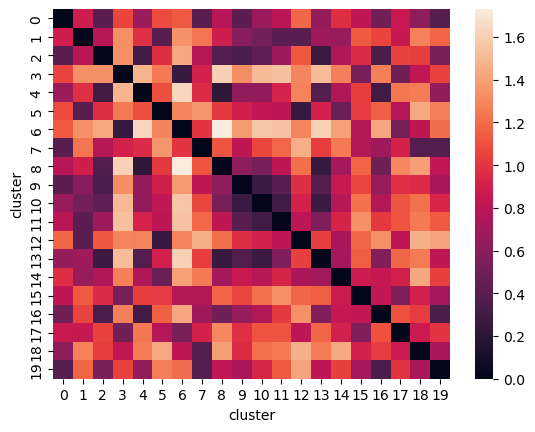

In [18]:
import seaborn as sns
sns.heatmap(pca_tab_5000)

In [29]:
pca_table

,0,1,2
0,0.240558,-0.505039,-0.273882
1,-0.208316,-0.383904,0.091799
2,-0.328660,-0.471112,0.285064
3,0.383740,-0.816332,-0.078838
4,0.442607,-0.754764,-0.165603
...,...,...,...
5230,1.113407,-0.125915,-0.113825
5231,0.915734,-0.222037,-0.319475
5232,1.409961,0.002957,-0.024864
5233,1.039605,-0.226845,-0.276935


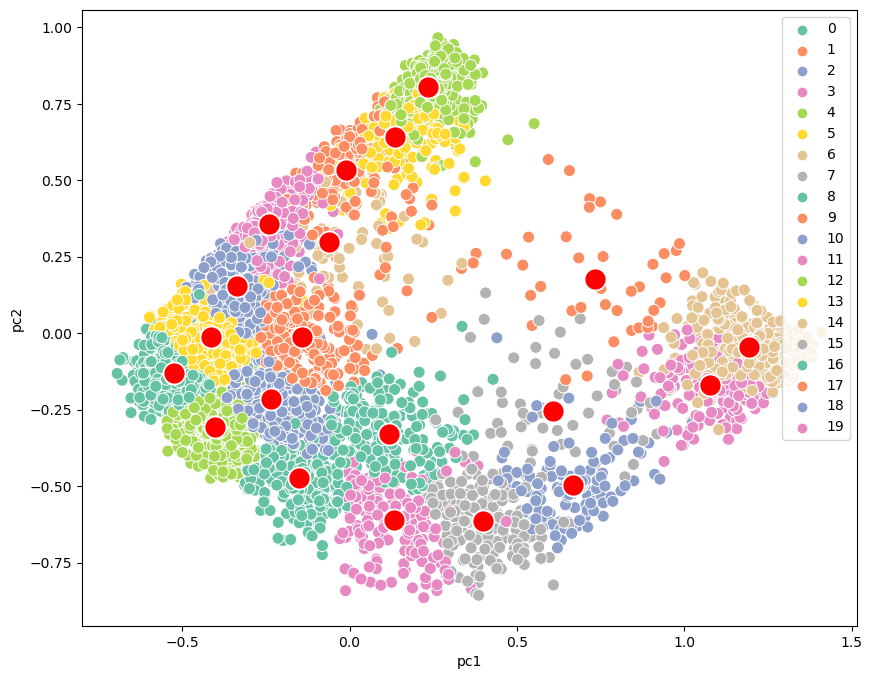

In [30]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['pc1','pc2','pc3']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(pca_table)
plot_data.columns = ['pc1','pc2','pc3']
plot_data['cluster'] = kmeans.labels_

sns.scatterplot(data=plot_data, x='pc1', y='pc2', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='pc1', y='pc2', color='red', s=250)
plt.show()

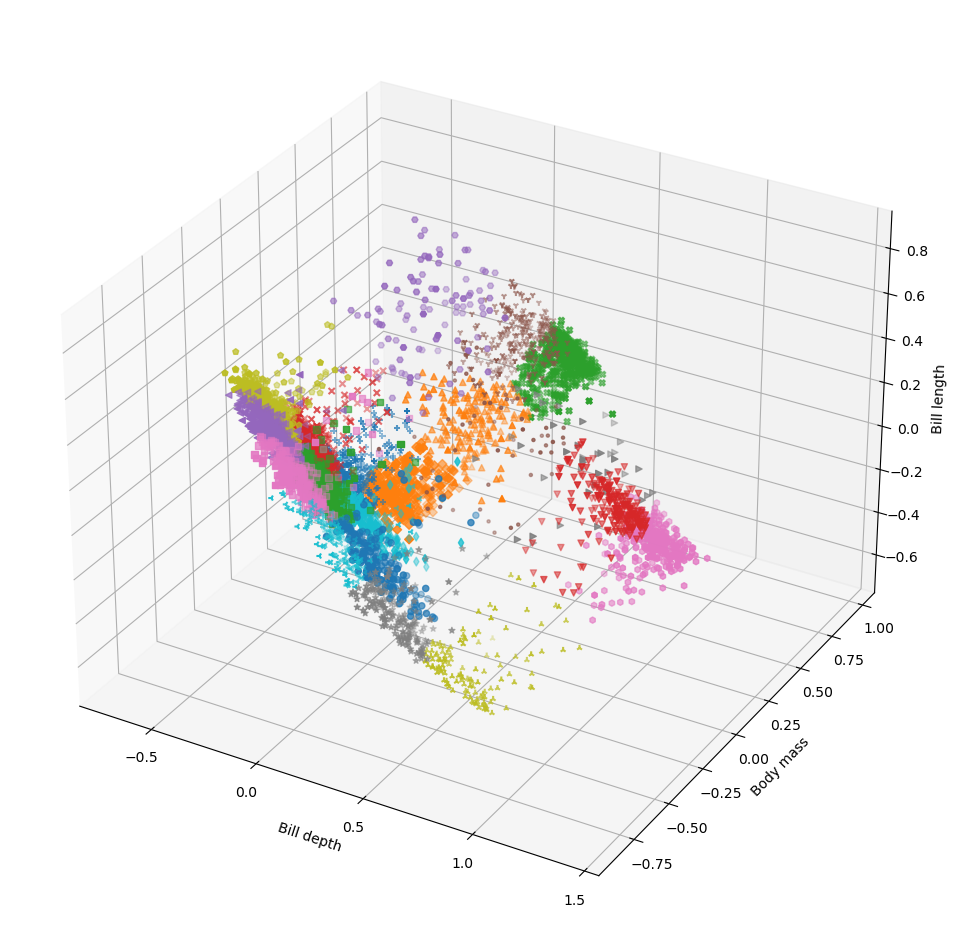

In [32]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b','m','c','y','k','w']
markers = ['o', '^','s',"v","<","1","h","*","p","d",'+',"D","X","x","H",".",","

,">","2","3","4","8"



]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['pc1'], d['pc2'], d['pc3'], marker=markers[marker], label=d['cluster'])

ax.set_xlabel('Bill depth')
ax.set_ylabel('Body mass')
ax.set_zlabel('Bill length')
plt.show()

In [33]:
from sklearn.cluster import KMeans

def inertia(table): #calculation inertia
    inertia_list = []

    for i in range(1,20):
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(table)
        inertia_list.append(round(myKMeans.inertia_))
    return inertia_list

In [41]:
pca_tab_without_clus = pca_table.drop(columns='cluster')

In [42]:
pca_tab_without_clus

,pc1,pc2,pc3
0,0.240558,-0.505039,-0.273882
1,-0.208316,-0.383904,0.091799
2,-0.328660,-0.471112,0.285064
3,0.383740,-0.816332,-0.078838
4,0.442607,-0.754764,-0.165603
...,...,...,...
5230,1.113407,-0.125915,-0.113825
5231,0.915734,-0.222037,-0.319475
5232,1.409961,0.002957,-0.024864
5233,1.039605,-0.226845,-0.276935


In [34]:
def graph(inerdef):  #preparing graph based on inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 to 20 clusters')
    sns.lineplot(x=range(1, 20), y=inerdef, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [43]:
inertia(pca_tab_without_clus)

[2402,
 1427,
 828,
 583,
 395,
 335,
 293,
 262,
 239,
 218,
 200,
 184,
 172,
 162,
 154,
 145,
 138,
 131,
 126]

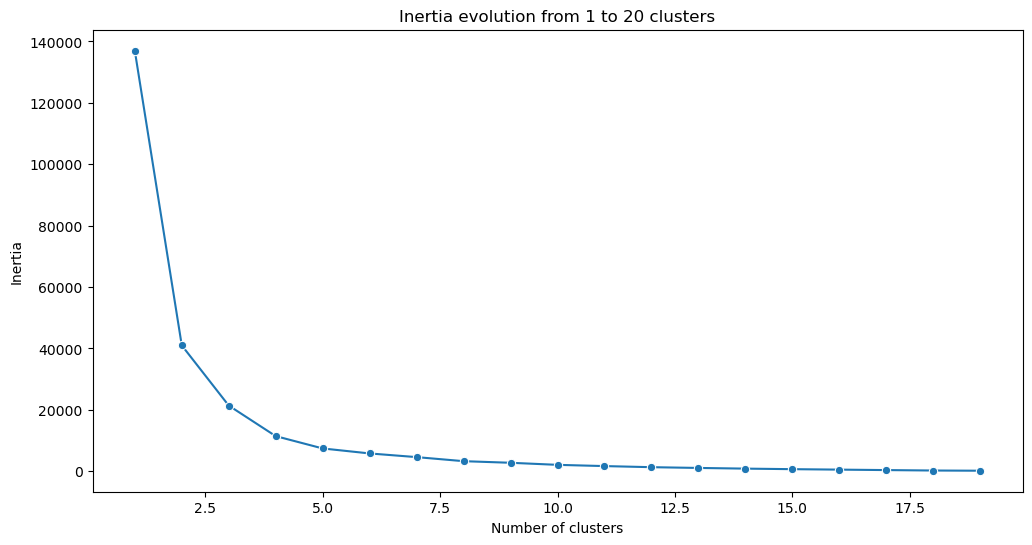

In [44]:
graph(inertia(pca_table))

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_tab_without_clus, kmeans.labels_)

0.3169326331162079

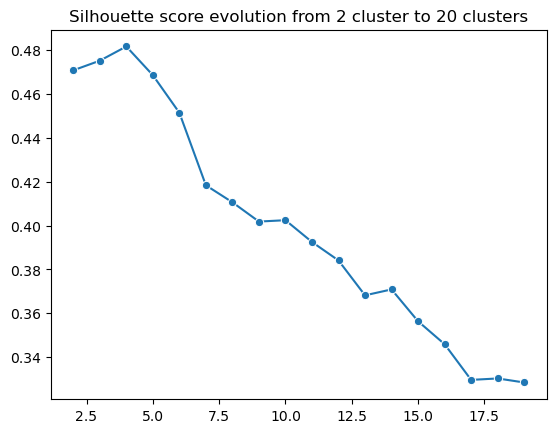

In [47]:
max_k = 20
sil_score = []


for k in range(2, max_k): 
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit(pca_tab_without_clus).labels_
    sil_score.append(silhouette_score(pca_tab_without_clus, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()